# p-values

Compute p-values.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## p-value table

In [ ]:
from scipy.stats import norm
import pandas
import numpy


def pvalue(p, q, N):
    theta   = abs(p-q)
    var     = p*(1-p) 
    bn      = (2*N)**0.5 * theta / var**0.5
    ret     = (1 - norm.cdf(bn))*2
    return ret

def pvalue_N(p, q, alpha):
    theta   = abs(p-q)
    var     = p*(1-p) 
    rev     = abs(norm.ppf (alpha/2))
    N       = 2 * (rev * var**0.5 / theta)** 2
    return int(N+1)

def alphatable(ps, dps, alpha):
    values = []
    for p in ps :
        row=[]
        for dp in dps :
            q = p+dp
            r = pvalue_N(p,q,alpha) if 1 >= q >= 0 else numpy.nan
            row.append (r)
        values.append (row)
    return values
    
def dataframe(ps,dps,table):
    columns = dps
    df = pandas.DataFrame(data=table, index=ps)
    df.columns = dps
    return df
        
        
print ("norm.ppf(0.025)",norm.ppf (0.025)) # -1.9599639845400545
ps  = [0.001, 0.002] + [ 0.05*i for i in range (1,20) ]
dps = [ -0.2, -0.1,  -0.02, -0.01, -0.002, -0.001,
         0.2,  0.1,   0.02,  0.01,  0.002,  0.001, ]
dps.sort()
t = alphatable(ps, dps, 0.05)
dataframe (ps, dps, t)

norm.ppf(0.025) -1.95996398454


,-0.2,-0.1,-0.02,-0.01,-0.002,-0.001,0.001,0.002,0.01,0.02,0.1,0.2
0.001,NaN,NaN,NaN,NaN,NaN,7676,7676,1919,77,20,1.0,1.0
0.002,NaN,NaN,NaN,NaN,3834.0,15336,15336,3834,154,39,2.0,1.0
0.050,NaN,NaN,913.0,3650.0,91235.0,364939,364939,91235,3650,913,37.0,10.0
0.100,NaN,70.0,1729.0,6915.0,172866.0,691463,691463,172866,6915,1729,70.0,18.0
0.150,NaN,98.0,2449.0,9796.0,244893.0,979572,979572,244893,9796,2449,98.0,25.0
0.200,31.0,123.0,3074.0,12293.0,307317.0,1229267,1229267,307317,12293,3074,123.0,31.0
0.250,37.0,145.0,3602.0,14406.0,360137.0,1440548,1440548,360137,14406,3602,145.0,37.0
0.300,41.0,162.0,4034.0,16135.0,403354.0,1613413,1613413,403354,16135,4034,162.0,41.0
0.350,44.0,175.0,4370.0,17479.0,436966.0,1747864,1747864,436966,17479,4370,175.0,44.0
0.400,47.0,185.0,4610.0,18440.0,460976.0,1843901,1843901,460976,18440,4610,185.0,47.0


## p-values in 2D

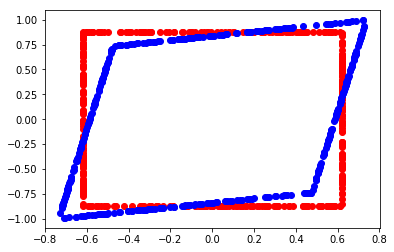

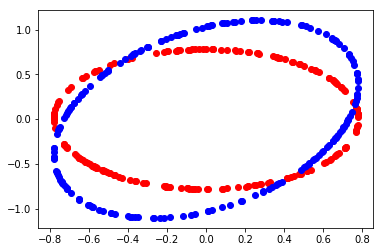

In [ ]:
import numpy, matplotlib, random, math
import matplotlib.pyplot as pylab


def matrix_square_root(sigma) :
    eigen, vect = numpy.linalg.eig(sigma)
    dim = len(sigma)
    res = numpy.identity(dim)
    for i in range(0,dim) :
        res[i,i] = eigen[i]**0.5
    return vect * res * vect.transpose()
    
def chi2_level (alpha = 0.95) :
    N = 1000
    x = [ random.gauss(0,1) for _ in range(0,N) ]
    y = [ random.gauss(0,1) for _ in range(0,N) ]
    r = map ( lambda c : (c[0]**2+c[1]**2)**0.5, zip(x,y))
    r = list(r)
    r.sort()
    res = r [ int (alpha * N) ]
    return res
    
def square_figure(mat, a) :    
    x = [ ]
    y = [ ]
    for i in range (0,100) :
        x.append ( a * mat[0][0]**0.5 ) 
        y.append ( (random.random ()-0.5) * a * mat[1][1]**0.5*2 )
        x.append ( -a * mat[0][0]**0.5 ) 
        y.append ( (random.random ()-0.5) * a * mat[1][1]**0.5*2 )

        y.append ( a * mat[1][1]**0.5 ) 
        x.append ( (random.random ()-0.5) * a * mat[0][0]**0.5*2 )
        y.append ( -a * mat[1][1]**0.5 ) 
        x.append ( (random.random ()-0.5) * a * mat[0][0]**0.5*2 )
        
    pylab.plot(x,y, 'ro')
    
    x = [ ]
    y = [ ]
    for i in range (0,100) :
        x.append ( a ) 
        y.append ( (random.random ()-0.5) * a*2 )
        x.append ( -a ) 
        y.append ( (random.random ()-0.5) * a*2  )
        
        y.append ( a ) 
        x.append ( (random.random ()-0.5) * a*2  )
        y.append ( -a ) 
        x.append ( (random.random ()-0.5) * a*2  )
        
    xs,ys = [],[]
    for a,b in zip (x,y) :
        ar = numpy.matrix( [ [a], [b] ] ).transpose()
        we = ar * root
        xs.append ( we [0,0] )
        ys.append ( we [0,1] )
        
    pylab.plot(xs,ys, 'bo')
    pylab.show()

def circle_figure (mat, a) :
    x = [ ]
    y = [ ]
    for i in range (0,200) :
        z = random.random() * math.pi * 2
        i = a * mat[0][0]**0.5 * math.cos(z)
        j = a * mat[0][0]**0.5 * math.sin(z)
        x.append ( i )
        y.append ( j )
    pylab.plot(x,y, 'ro')
    
    x = [ ]
    y = [ ]
    for i in range (0,200) :
        z = random.random() * math.pi * 2
        i = a * math.cos(z)
        j = a * math.sin(z)
        x.append ( i )
        y.append ( j )
        
    xs,ys = [],[]
    for a,b in zip (x,y) :
        ar = numpy.matrix( [ [a], [b] ] ).transpose()
        we = ar * root
        xs.append ( we [0,0] )
        ys.append ( we [0,1] )
        
    pylab.plot(xs,ys, 'bo')
    pylab.show()

level = chi2_level ()
mat   = [ [0.1, 0.05], [0.05, 0.2] ]
npmat = numpy.matrix(mat)
root  = matrix_square_root (npmat)
square_figure (mat, 1.96)
circle_figure (mat, level)

## p-value ratio

In [ ]:
import random, math

def densite_gauss (mu, sigma, x) :
    e = -(x - mu)**2 / (sigma**2 * 2)
    d = 1. / ((2*math.pi)**0.5 * sigma)
    return d * math.exp (e)
    
def simulation_vector (N, mu, sigma) :
    return [ random.gauss(mu,sigma) for n in range(N) ]
    
def ratio (vector, x, fdensite) :
    under = 0
    above = 0
    fx    = fdensite(x)
    for u in vector :
        f = fdensite (u)
        if f >= fx : above += 1
        else : under += 1
    return float(above) / float (above + under)
        
x     = 1.96
N     = 10000
mu    = 0
sigma = 1

v = simulation_vector (N, mu, sigma)
g = ratio (v, x, lambda y : densite_gauss (mu, sigma, y) )
print (g)

0.9501


## p-values and EM

See [Applying the EM Algorithm: Binomial Mixtures](http://statisticalrecipes.blogspot.fr/2012/04/applying-em-algorithm-binomial-mixtures.html).

In [ ]:
from scipy.stats import norm
import random, math


def average_std_deviation (sample) :
    mean = 0.
    var  = 0.
    for x in sample :
        mean += x
        var += x*x
    mean /= len(sample)
    var /= len(sample)
    var -= mean*mean
    return mean,var ** 0.5

def bootsample (sample) :
    n = len(sample)-1
    return [ sample[ random.randint(0,n) ] for _ in sample ]
    
def bootstrap_difference (sampleX, sampleY, draws = 2000, confidence = 0.05) :
    diff = [ ]
    for n in range (0,draws) :
        if n % 1000 == 0: 
            print(n)
        sx = bootsample(sampleX)
        sy = bootsample(sampleY)
        px = sum(sx) * 1.0/ len(sx)
        py = sum(sy) * 1.0/ len(sy)
        diff.append (px-py) 
    diff.sort()
    n = int(len(diff) * confidence / 2)
    av = sum(diff) / len(diff)
    return av, diff [n], diff [len(diff)-n]

# generation of a sample

def generate_obs (p) :
    x = random.random()
    if x <= p : return 1
    else : return 0

def generate_n_obs (p, n) :
    return [ generate_obs(p) for i in range (0,n) ]
        
# std deviation

def diff_std_deviation (px, py) :
    s = px*(1-px) + py*(1-py)
    return px, py, s**0.5

def pvalue (diff, std, N) :
    theta = abs(diff)
    bn = (2*N)**0.5 * theta / std
    pvalue = (1 - norm.cdf(bn))*2
    return pvalue
    
def omega_i (X, pi, p, q) :
    np = p * pi     if X == 1 else (1-p)*pi
    nq = q * (1-pi) if X == 1 else (1-q)*(1-pi)
    return np / (np + nq)
    
def likelihood (X, pi, p, q) :
    np = p * pi     if X == 1 else (1-p)*pi
    nq = q * (1-pi) if X == 1 else (1-q)*(1-pi)
    return math.log(np) + math.log(nq)
    
def algoEM (sample) :
    p   = random.random()
    q   = random.random()
    pi  = random.random()
    iter   = 0
    while iter < 10 :
        lk = sum ( [ likelihood (x, pi, p, q) for x in sample ] )
        wi  = [ omega_i (x, pi, p, q) for x in sample ]
        sw  = sum(wi)
        pin = sum(wi) / len(wi)
        pn  = sum([ x * w     for x,w in zip (sample,wi) ]) / sw
        qn  = sum([ x * (1-w) for x,w in zip (sample,wi) ]) / (len(wi) - sw)
        
        pi,p,q = pin,pn,qn
        iter += 1
        
    lk = sum ( [ likelihood (x, pi, p, q) for x in sample ] )
    return pi,p,q, lk


# mix
p,q   = 0.20, 0.80
pi    = 0.7
N     = 1000
na    = int(N * pi)
nb    = N - na

print("------- sample")
sampleX = generate_n_obs(p, na) + generate_n_obs (q, nb)
random.shuffle(sampleX)
print("ave", p * pi + q*(1-pi))
print("mea", sum(sampleX)*1./len(sampleX))

lk = sum ( [ likelihood (x, pi, p, q) for x in sampleX ] )
print ("min lk", lk, sum (sampleX)*1. / len(sampleX))
res = []
for k in range (0, 10) :
    r = algoEM (sampleX)
    res.append ( (r[-1], r) )
res.sort ()

rows = []
for r in res:
    pi,p,q,lk = r[1]
    rows.append( [p * pi + q*(1-pi)] + list(r[1]))

df = pandas.DataFrame(data=rows)
df.columns = ["average", "pi", "p", "q", "likelihood"]
df

------- sample
ave 0.38
mea 0.384
min lk -3393.2292120130046 0.384


,average,pi,p,q,likelihood
0,0.384,0.954307,0.402052,0.006975,-5710.304473
1,0.384,0.019713,0.270508,0.386282,-5308.730178
2,0.384,0.164644,0.978703,0.266788,-5061.766469
3,0.384,0.434893,0.062162,0.631679,-3301.348979
4,0.384,0.445488,0.070406,0.635937,-3258.401454
5,0.384,0.307983,0.664582,0.259127,-3078.983491
6,0.384,0.276204,0.293889,0.418387,-2962.885049
7,0.384,0.477705,0.281454,0.477792,-2762.541632
8,0.384,0.546659,0.313153,0.469431,-2753.103235
9,0.384,0.534303,0.333542,0.441891,-2735.460008


## class TableFormula

In [ ]:
class TableFormula(pandas.DataFrame):
    
    def __init__(self, cols, data):
        pandas.DataFrame.__init__(self, data=data)
        self.columns = cols
        
    def sort(self, lf):
        df = self.copy()
        df["key"] = self.apply(lambda row: lf(row), axis=1)
        res = df.sort_values("_key_")
        return res.drop("_key_")

## p-value and heavy tail

In [ ]:
from scipy.stats import norm
from scipy.stats import zipf
import sys


def generate_n_obs_zipf (tail_index, n) :
    return list(zipf.rvs(tail_index, size=n))
        
def diff_std_deviation (px, py) :
    s = px*(1-px) + py*(1-py)
    return px, py, s**0.5

def pvalue (diff, std, N) :
    theta = abs(diff)
    bn = (2*N)**0.5 * theta / std
    pvalue = (1 - norm.cdf(bn))*2
    return pvalue
    
def draw_heavy_tail (sample, imagename) :
    table   = TableFormula (["obs"], [ [_] for _ in sample ] )
    avg,std = table.avg_std (lambda v : v["obs"])
    print("avg,std", avg,std)
    std = 1

    normal  = norm.rvs (size = len(sample))
    normal  = [ x*std  for x in normal ]
    nortbl  = TableFormula (["obs"], [ [_] for _ in normal ] )
    nortbl.addc ("iobs", lambda v : int(v ["obs"] * 10))
    histon  = nortbl.groupby ( lambda v :v["iobs"], 
                            [ lambda v : v["iobs"] ],
                            ["value", "nb"],
                            [ len ] )
    histon.sort (lambda v : v["nb"], reverse = True)
    
    histo   = table.groupby ( lambda v :v["obs"], 
                            [ lambda v : v["obs"] ],
                            ["value", "nb"],
                            [ len ] )
                            
    histo.sort (lambda v : v["nb"], reverse = True)
    histo.add_column_index("index", 1)
    
    vec  = list (histon.select (lambda v : v ["nb"]))
    vec += [0,] * len(histo)
    histo.add_column_vector("nb_normal", vec [:len(histo) ] )
    
    histo.addc ("log(index)", lambda v : math.log(v ["index"]) / math.log(10) )
    histo.addc ("log(nb)", lambda v : math.log(v ["nb"]) / math.log(10) )
    histo.addc ("log(nb_normal)", lambda v : math.log(v ["nb_normal"]) / math.log(10) if v["nb_normal"] > 0 else 0) 
    histo = TableFormulaGraph (histo)
    histo.graph_XY ( [ 
            [ lambda v: v["log(index)"], lambda v: v["log(nb)"], "Zipf"],
            [ lambda v: v["log(index)"], lambda v: v["log(nb_normal)"], "Gauss"],
                        ],
                     outImage = imagename,
                     marker=False, linkPoint=True)    
    
def draw_variancen (sample, imagename) :
    avg = 0.
    std = 0.
    n   = 0.
    w   = 1.
    add = [] 
    for i,x in enumerate(sample) :
        x    = float (x)
        avg += x * w
        std += x*x * w
        n   += w
        val  = (std/n - (avg/n)**2)**0.5
        add.append ( [ i, avg/n, val] )
    
    print(add[-1])
    table = TableFormulaGraph ( ["index", "avg(n)", "std(n)"], add)
    table.graph_XY ( [ 
            [ lambda v: v["index"], lambda v: v["avg(n)"], "avg(n)"],
            [ lambda v: v["index"], lambda v: v["std(n)"], "std(n)"],
                        ],
                     outImage = imagename,
                     marker=False, linkPoint=True)    
                     
def hill_estimator (sample) :
    sample = list(sample)
    sample.sort(reverse=True)
    end = len(sample)/10
    end = min(end,100)
    s = 0.
    res = []
    for k in range (0,end) :
        s += math.log(sample[k])
        h = (s - (k+1)*math.log(sample[k+1]))/(k+1)
        h = 1./h
        res.append( [k, h] )
    return res


def draw_hill_estimator (sample, imagename) :
    res = hill_estimator(sample)
    table = TableFormulaGraph (["d", "hill"], res )
    table.graph_XY ( [ 
            [ lambda v: v["d"], lambda v: v["hill"], "Hill"],
                        ],
                     outImage = imagename,
                     marker=False, linkPoint=True)    

    
# mix
tail_index  = 1.05
N           = 10000

sample = generate_n_obs_zipf(tail_index, N)
draw_heavy_tail(sample, "distribution_zipf_%d.png" % N)
draw_variancen(sample, "std deviation after n obs.png")
draw_hill_estimator(sample, "hill.png")

TableFormulaGraph.ShowLastGraph()

AttributeError: 'TableFormula' object has no attribute 'avg_std'

## p-value and distinct values

In [ ]:
from scipy.stats import norm
from scipy.stats import zipf
import sys


def generate_n_obs_zipf (tail_index, n) :
    return list(zipf.rvs(tail_index, size=n))
        
def diff_std_deviation (px, py) :
    s = px*(1-px) + py*(1-py)
    return px, py, s**0.5

def pvalue (diff, std, N) :
    theta = abs(diff)
    bn = (2*N)**0.5 * theta / std
    pvalue = (1 - norm.cdf(bn))*2
    return pvalue
    
def draw_heavy_tail (sample, imagename) :
    table   = TableFormula (["obs"], [ [_] for _ in sample ] )
    avg,std = table.avg_std (lambda v : v["obs"])
    print ("avg,std", avg,std)
    std = 1

    normal  = norm.rvs (size = len(sample))
    normal  = [ x*std  for x in normal ]
    nortbl  = TableFormula (["obs"], [ [_] for _ in normal ] )
    nortbl.addc ("iobs", lambda v : int(v ["obs"] * 10))
    histon  = nortbl.groupby ( lambda v :v["iobs"], 
                            [ lambda v : v["iobs"] ],
                            ["value", "nb"],
                            [ len ] )
    histon.sort (lambda v : v["nb"], reverse = True)
    
    histo   = table.groupby ( lambda v :v["obs"], 
                            [ lambda v : v["obs"] ],
                            ["value", "nb"],
                            [ len ] )
                            
    histo.sort (lambda v : v["nb"], reverse = True)
    histo.add_column_index("index", 1)
    
    vec  = list (histon.select (lambda v : v ["nb"]))
    vec += [0,] * len(histo)
    histo.add_column_vector("nb_normal", vec [:len(histo) ] )
    
    histo.addc ("log(index)", lambda v : math.log(v ["index"]) / math.log(10) )
    histo.addc ("log(nb)", lambda v : math.log(v ["nb"]) / math.log(10) )
    histo.addc ("log(nb_normal)", lambda v : math.log(v ["nb_normal"]) / math.log(10) if v["nb_normal"] > 0 else 0) 
    histo = TableFormulaGraph (histo)
    histo.graph_XY ( [ 
            [ lambda v: v["log(index)"], lambda v: v["log(nb)"], "Zipf"],
            [ lambda v: v["log(index)"], lambda v: v["log(nb_normal)"], "Gauss"],
                        ],
                     outImage = imagename,
                     marker=False, linkPoint=True)    
    
def draw_variancen (sample, imagename) :
    avg = 0.
    std = 0.
    n   = 0.
    w   = 1.
    add = [] 
    for i,x in enumerate(sample) :
        x    = float (x)
        avg += x * w
        std += x*x * w
        n   += w
        val  = (std/n - (avg/n)**2)**0.5
        add.append ( [ i, avg/n, val] )
    
    print(add[-1])
    table = TableFormulaGraph ( ["index", "avg(n)", "std(n)"], add)
    table.graph_XY ( [ 
            [ lambda v: v["index"], lambda v: v["avg(n)"], "avg(n)"],
            [ lambda v: v["index"], lambda v: v["std(n)"], "std(n)"],
                        ],
                     outImage = imagename,
                     marker=False, linkPoint=True)    
                     
def hill_estimator (sample) :
    sample = list(sample)
    sample.sort(reverse=True)
    end = len(sample)/10
    end = min(end,100)
    s = 0.
    res = []
    for k in range (0,end) :
        s += math.log(sample[k])
        h = (s - (k+1)*math.log(sample[k+1]))/(k+1)
        h = 1./h
        res.append( [k, h] )
    return res
    
def draw_hill_estimator (sample, imagename) :
    res = hill_estimator(sample)
    table = TableFormulaGraph (["d", "hill"], res )
    table.graph_XY ( [ 
            [ lambda v: v["d"], lambda v: v["hill"], "Hill"],
                        ],
                     outImage = imagename,
                     marker=False, linkPoint=True)    

    
def generate_series ( Ndays, tail_index, N) :
    res = [ ]
    total = [ ]
    for i in range(0,Ndays) :
        sample = generate_n_obs_zipf(tail_index, N)
        total.extend(sample)
        dis = { }
        for t in total : dis[t] = 0
        res.append( len(dis) )
    return res
    
def std (l) :
    m = sum(l)
    v = sum ( [_*_ for _ in l ] )
    m = m*1. / len(l)
    v = v*1. / len(l)
    return (v - m*m)**0.5


# mix
tail_index  = 3
N           = 100
Ndays       = 200

values = [ ]
label  = None 
for k in range (0,50) :
    print(k)
    series      = generate_series( Ndays, tail_index, N)
    if label == None :
        label = [ "d%d" % (k+1) for k in range(0,len(series)) ]
    values.append (series)

table = TableFormula (label, values)
table = table.transpose (labelAsRow = False)
table.addc ("ave", lambda v : sum( v.values() )*1.0 / len(v) )
table.addc ("dev", lambda v : std( v.values() ) )

print(table)

draw_heavy_tail(sample, "distribution_zipf_%d.png" % N)
draw_variancen(sample, "std deviation after n obs.png")
draw_hill_estimator(sample, "hill.png")

TableFormulaGraph.ShowLastGraph()
    

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-32-715166eb959c>, line 72)